## Descripció

Aprèn a gestionar paràmetres amb Python.

## Nivell 1

**- Exercici 1:**
Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Estandaritza els atributs numèrics amb StandardScaler. 

Agafo la base de dades emprada a l'exercici anterior dels athletes olímpics, que recull dades dels athletes, competicions que van participar i si van guanyar medalla o no (aprofito que ja està neta de dades nules i l'havia salvada en format csv). 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
%matplotlib inline   

In [2]:
ath_df=pd.read_csv('athletes_olimpics.csv')
ath_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32374 entries, 0 to 32373
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      32374 non-null  int64  
 1   Name    32374 non-null  object 
 2   Sex     32374 non-null  object 
 3   Age     32374 non-null  float64
 4   Height  32374 non-null  float64
 5   Weight  32374 non-null  float64
 6   Team    32374 non-null  object 
 7   NOC     32374 non-null  object 
 8   Games   32374 non-null  object 
 9   Year    32374 non-null  int64  
 10  City    32374 non-null  object 
 11  Event   32374 non-null  object 
 12  Medal   32374 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 3.2+ MB


Generem variables dummy a partir de les variables categòriques de sexe i medalles:

In [3]:
#La manera més senzilla i directe de fer-ho és amb la funció get_dummies de pandas:
ath_df_dummies=pd.get_dummies(ath_df, columns=['Sex', 'Medal'])
ath_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32374 entries, 0 to 32373
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            32374 non-null  int64  
 1   Name          32374 non-null  object 
 2   Age           32374 non-null  float64
 3   Height        32374 non-null  float64
 4   Weight        32374 non-null  float64
 5   Team          32374 non-null  object 
 6   NOC           32374 non-null  object 
 7   Games         32374 non-null  object 
 8   Year          32374 non-null  int64  
 9   City          32374 non-null  object 
 10  Event         32374 non-null  object 
 11  Sex_F         32374 non-null  uint8  
 12  Sex_M         32374 non-null  uint8  
 13  Medal_0       32374 non-null  uint8  
 14  Medal_Bronze  32374 non-null  uint8  
 15  Medal_Gold    32374 non-null  uint8  
 16  Medal_Silver  32374 non-null  uint8  
dtypes: float64(3), int64(2), object(6), uint8(6)
memory usage: 2.9+ MB


In [4]:
#També es pot fer columna dummy generant columna a columna amb condició, ja sigui directament en pandas o amb la funció de numpy where:
ath_df_dummies2=ath_df.copy()
#ath_df_dummies2['Sex_F']=[np.uint8(1) if s =='F' else np.uint8(0) for s in ath_df_dummies2['Sex']]
ath_df_dummies2['Sex_F'] =np.where(ath_df_dummies2['Sex']=='F', np.uint8(1),np.uint8(0))
ath_df_dummies2.info() 
# d'aquesta manera no es generen columnes dummies redundants si no es dessitja.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32374 entries, 0 to 32373
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      32374 non-null  int64  
 1   Name    32374 non-null  object 
 2   Sex     32374 non-null  object 
 3   Age     32374 non-null  float64
 4   Height  32374 non-null  float64
 5   Weight  32374 non-null  float64
 6   Team    32374 non-null  object 
 7   NOC     32374 non-null  object 
 8   Games   32374 non-null  object 
 9   Year    32374 non-null  int64  
 10  City    32374 non-null  object 
 11  Event   32374 non-null  object 
 12  Medal   32374 non-null  object 
 13  Sex_F   32374 non-null  uint8  
dtypes: float64(3), int64(2), object(8), uint8(1)
memory usage: 3.2+ MB


Procedim a estandaritzar els paràmetres d'edat, alçada i pes amb StandardScaler:

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
# definim standard scaler
scaler = StandardScaler()


In [7]:
data = ath_df_dummies.values[:,2:5]#agafem els valors a normalitzar i els transformem
data = scaler.fit_transform(data)
# convertir l'array en un dataframe i l'incorporem a un nou dataframe que conté afegides les columnes amb valors estandaritzats
dataset = pd.DataFrame(data)
ath_df_dummies_stand =ath_df_dummies.copy()
j=0
for i in ['Age_stand', 'Height_stand', 'Weight_stand']:
    ath_df_dummies_stand[i]=dataset.iloc[:,j]
    j+=1
ath_df_dummies_stand.head()

,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,City,Event,Sex_F,Sex_M,Medal_0,Medal_Bronze,Medal_Gold,Medal_Silver,Age_stand,Height_stand,Weight_stand
0,18,Timo Antero Aaltonen,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Sydney,Athletics Men's Shot Put,0,1,1,0,0,0,1.286521,1.363081,3.938085
1,31,Evald rma (rman-),24.0,174.0,70.0,Estonia,EST,1936 Summer,1936,Berlin,Athletics Men's Pole Vault,0,1,1,0,0,0,-0.301834,-0.243878,0.047098
2,34,Jamale (Djamel-) Aarrass (Ahrass-),30.0,187.0,76.0,France,FRA,2012 Summer,2012,London,"Athletics Men's 1,500 metres",0,1,1,0,0,0,1.059613,1.148819,0.436197
3,47,Erling Rudolf Aastad,22.0,177.0,74.0,Norway,NOR,1920 Summer,1920,Antwerpen,Athletics Men's 4 x 100 metres Relay,0,1,1,0,0,0,-0.755649,0.077514,0.306497
4,47,Erling Rudolf Aastad,22.0,177.0,74.0,Norway,NOR,1920 Summer,1920,Antwerpen,Athletics Men's Long Jump,0,1,1,0,0,0,-0.755649,0.077514,0.306497


Si mirem la repressentació gràfica de les dades modificades amb les inicials, veiem que tenen una distribució análoga a la graficada inicialment però amb la mateixa escala  (veure Exercici 1 del Srint 7) .

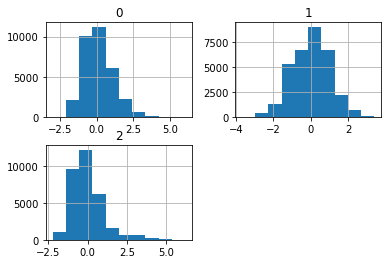

In [8]:
dataset.hist()
plt.show()

Webs consultades: 
* https://towardsdatascience.com/3-methods-to-create-conditional-columns-with-python-pandas-and-numpy-a6cd4be9da53
* https://www.marsja.se/how-to-use-pandas-get_dummies-to-create-dummy-variables-in-python/
* https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

## Nivell 2

**- Exercici 2:**
Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.

Prenem les dades estandaritzades de l'exercici anterior (on data= estandarització de l'edat, alçada i pes). Apliquem l'anàlisis de components principals per a reduir-ne la dimensionalitat a costa de perdre informació de la variança. Els motius per a fer-ho poden ser facilitar la visualització de dades o bé per accelerar l'aplicació d'algoritmes en machine-learning. 

Fem els exercicis de passar de tres dimensions a dues i de tres a una:

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # de n dimensions a 2
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [10]:
principalDf

,principal component 1,principal component 2
0,3.835545,1.099971
1,-0.160380,-0.280181
2,1.194042,0.948527
3,0.216082,-0.764326
4,0.216082,-0.764326
...,...,...
32369,-0.138158,-0.008589
32370,-0.072062,0.895484
32371,-0.005966,1.799556
32372,-0.744145,-1.376091


In [11]:
pca = PCA(n_components=1)  # de n dimensions a 1
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component'])
principalDf


,principal component
0,3.835545
1,-0.160380
2,1.194042
3,0.216082
4,0.216082
...,...
32369,-0.138158
32370,-0.072062
32371,-0.005966
32372,-0.744145


Webs consultades:
* https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60


## Nivell 3

**- Exercici 3:**
Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

Per a la normalització de dades tenint outliers, el millor es fer una estandarització robusta o un escalat de dades robustes. Amb PYthon això s'aconsegueix amb la funció RobustScaler implementada a la llibreria Sklearn.

                  0             1             2
count  32374.000000  32374.000000  32374.000000
mean       0.055034      0.021266      0.133749
std        0.734524      0.718042      0.907088
min       -2.166667     -2.615385     -1.882353
25%       -0.500000     -0.461538     -0.470588
50%        0.000000      0.000000      0.000000
75%        0.500000      0.538462      0.529412
max        4.500000      2.461538      5.764706


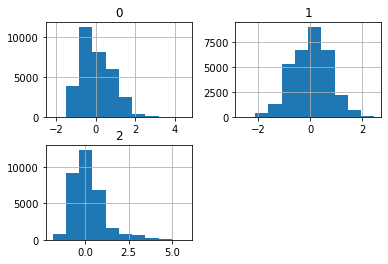

In [12]:
from sklearn.preprocessing import RobustScaler
data = ath_df_dummies.values[:,2:5]#agafem els paràmetres (edat, alçada i pes) a normalitzar 
trans = RobustScaler()
data = trans.fit_transform(data)
# convertim array a dataframe i visualitzem les dades estadístiques rellevants
dataset = pd.DataFrame(data)
print(dataset.describe())
# histograma de les variables
dataset.hist()
plt.show()


Webs consultades més rellevants:
   * https://www.delftstack.com/es/howto/python-pandas/pandas-normalize/
   * https://aprendeia.com/limpieza-y-procesamiento-de-datos-con-codigo-en-python/
   * https://machinelearningmastery.com/robust-scaler-transforms-for-machine-learning/